In [1]:
from astropy.io import fits
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = '25'
mpl.rcParams['xtick.labelsize'] = '20'
mpl.rcParams['ytick.labelsize'] = '20'

In [3]:
import os

## Calibrated spectrum for each exposure

Standard star: HIP95793
- Spectral type: $A_0$
- $M_V=5.783$

In [4]:
Sci_folder = 'gemini_gnirs_pypeit/Science/'
ls = [
    i for i in os.listdir(Sci_folder)
    if ('SN2020jgb' in i and 'fits' in i and 'spec1d' in i)
]
'''ls_cal = [
    i for i in os.listdir(Sci_folder)
    if ('HIP' in i and 'fits' in i and 'spec1d' in i)
]'''

"ls_cal = [\n    i for i in os.listdir(Sci_folder)\n    if ('HIP' in i and 'fits' in i and 'spec1d' in i)\n]"

spec1d_N20200609S0013-SN2020jgb_GNIRS_20200609T105951.402.fits


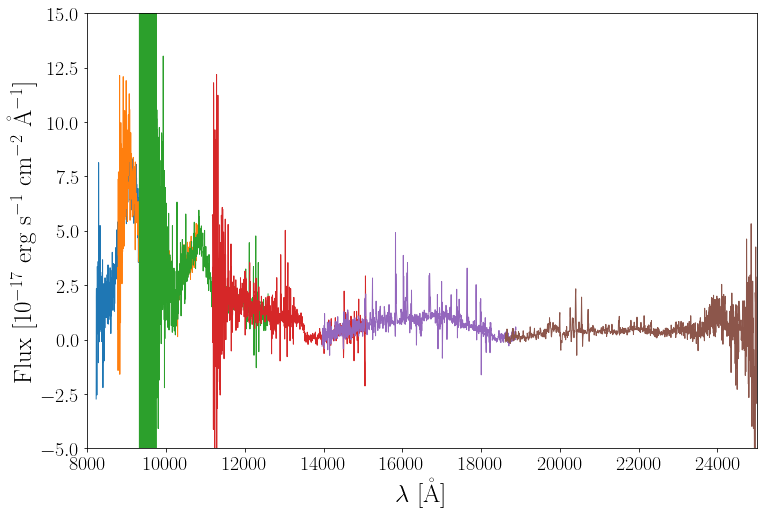

spec1d_N20200609S0017-SN2020jgb_GNIRS_20200609T112121.352.fits


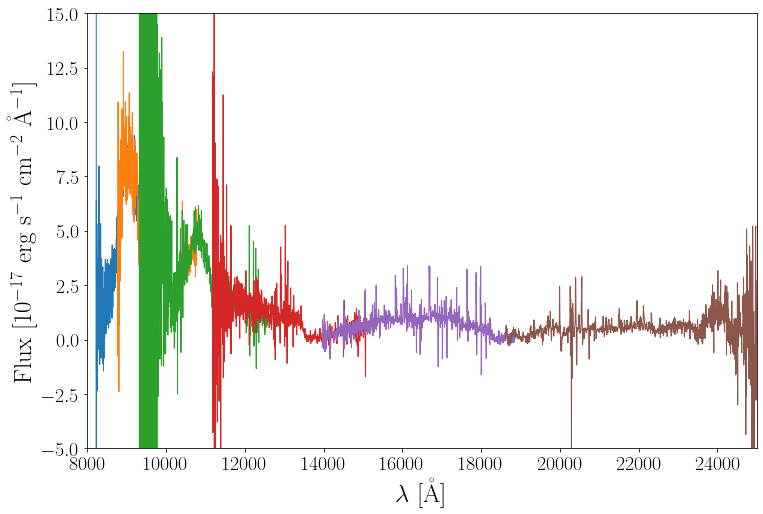

spec1d_N20200609S0012-SN2020jgb_GNIRS_20200609T105430.352.fits


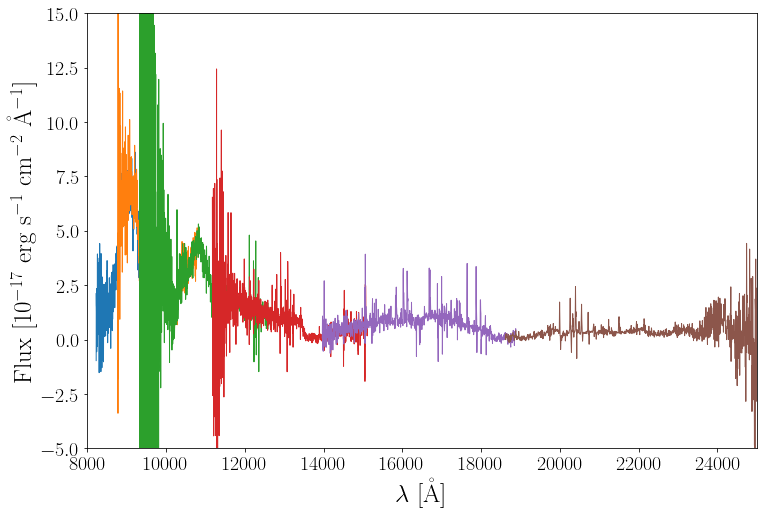

spec1d_N20200609S0014-SN2020jgb_GNIRS_20200609T110515.435.fits


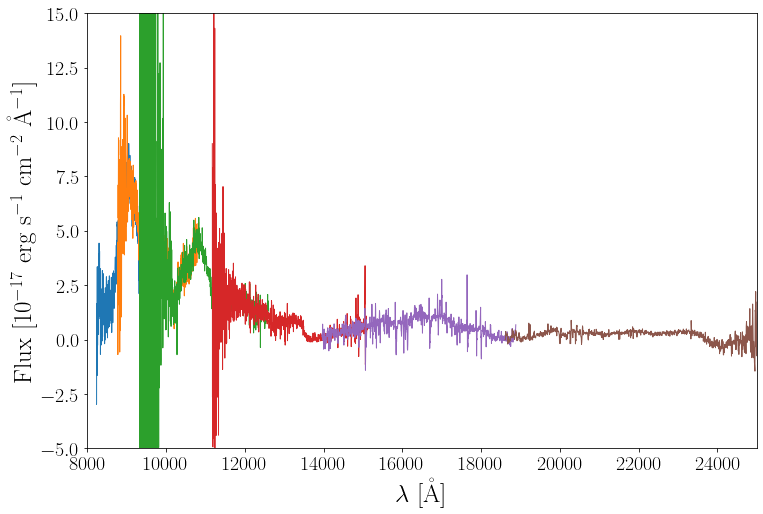

spec1d_N20200609S0016-SN2020jgb_GNIRS_20200609T111600.402.fits


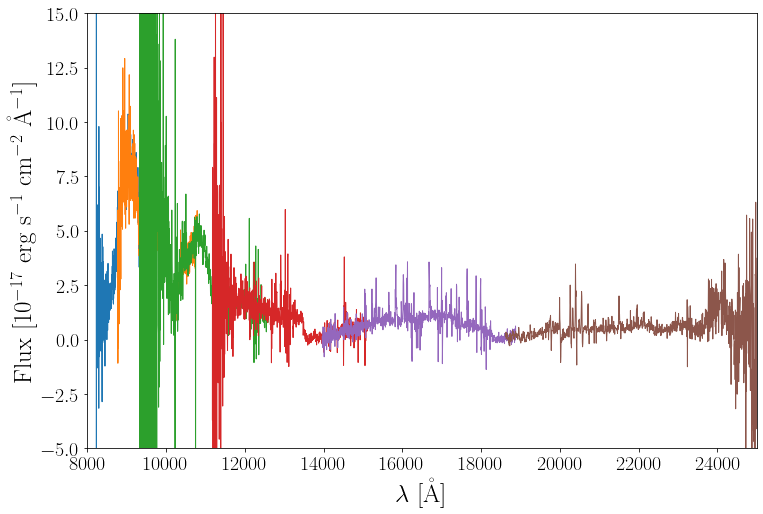

spec1d_N20200609S0015-SN2020jgb_GNIRS_20200609T111036.452.fits


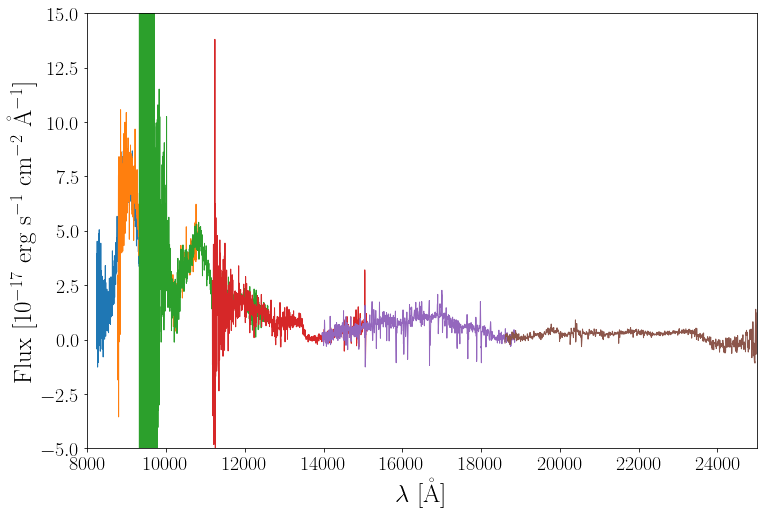

spec1d_N20200609S0018-SN2020jgb_GNIRS_20200609T112645.702.fits


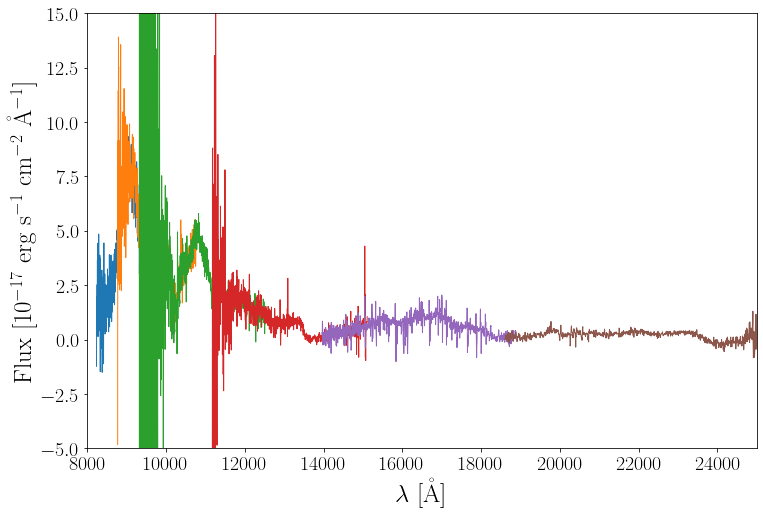

spec1d_N20200609S0011-SN2020jgb_GNIRS_20200609T104906.269.fits


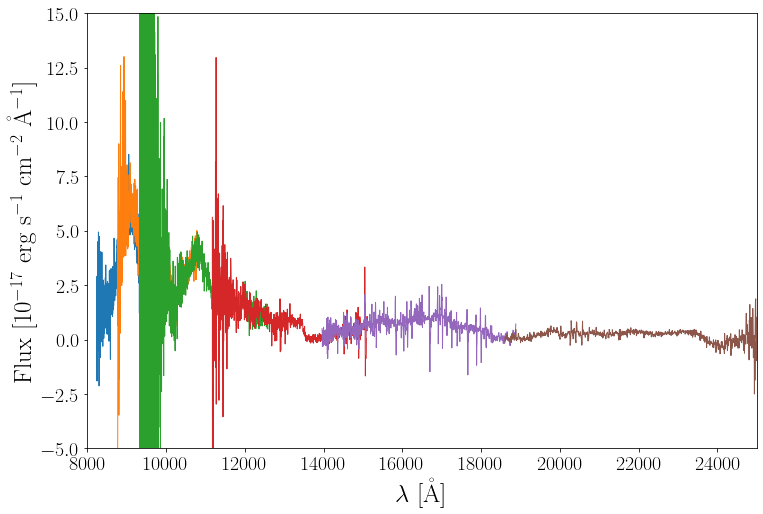

In [5]:
for m, l in enumerate(ls):
    plt.figure(figsize=(12, 8))
    print(l)
    for k in np.arange(6) + 1:
        f = fits.open(Sci_folder + l)
        if len(f) > 8:
            specdata = f[k + 6].data
        else:
            specdata = f[k].data
        wav = np.array([i[2] for i in specdata])
        #print(specdata)
        flux = np.array([i[3] for i in specdata])
        f.close()
        plt.plot(wav[wav > 8200], flux[wav > 8200], linewidth=1)
        plt.xlim(8000, 25000)
        plt.ylim(-5, 15)
        plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
        plt.ylabel(
            r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
        )
    plt.show()

## Coadding

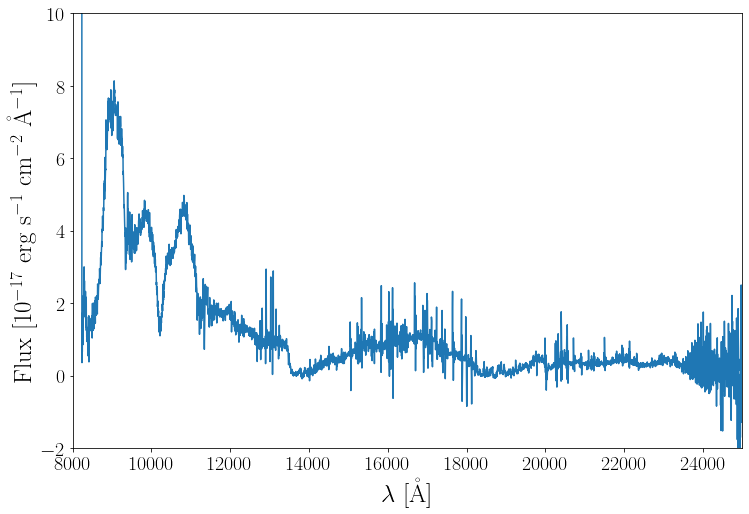

In [6]:
Coadd_folder = 'gemini_gnirs_pypeit/Coadding/'
f = fits.open(Coadd_folder + 'SN2020jgb_coadd_1.fits')
specdata = f[1].data
f.close()
plt.figure(figsize=(12, 8))
wav = np.array([i[0] for i in specdata])
flux = np.array([i[1] for i in specdata])
f.close()
plt.plot(wav, flux)
plt.xlim(8000, 25000)
plt.ylim(-2, 10)
plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
plt.ylabel(
    r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
)
f.close()

## Telluric correction

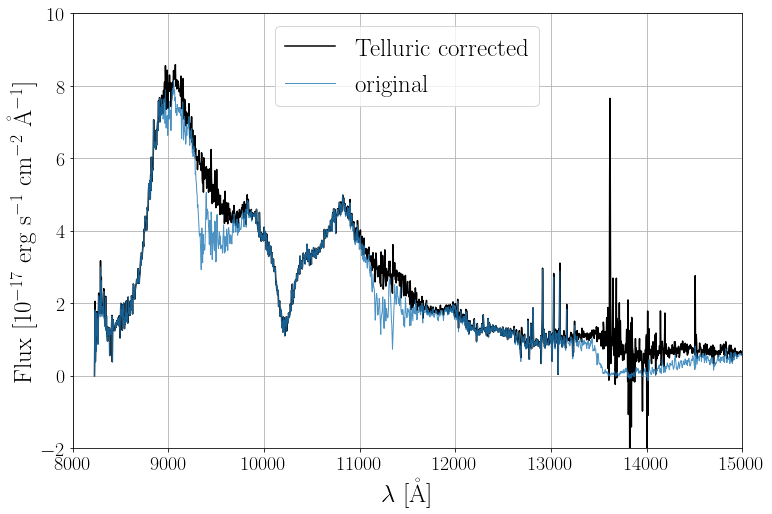

In [7]:
Tell_folder = 'gemini_gnirs_pypeit/Telluric/'
f = fits.open(Tell_folder + 'SN2020jgb_coadd_1_tellcorr.fits')
fmodel = fits.open(Tell_folder + 'SN2020jgb_coadd_1_tellmodel.fits')
specdata = f[1].data
model = fmodel[1].data
f.close()
plt.figure(figsize=(12, 8))
wav = np.array([i[0] for i in specdata])
flux = np.array([i[1] for i in specdata])
plt.plot(wav,
         flux,
         color='k',
         label=r'$\mathrm{Telluric}\ \mathrm{corrected}$')
plt.plot(model[0][0],
         flux * model[0][1],
         linewidth=1,
         alpha=0.8,
         label=r'$\mathrm{original}$')
plt.xlim(8000, 15000)
plt.ylim(-2, 10)
plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
plt.ylabel(
    r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
)
plt.legend()
plt.grid()
plt.savefig('SN2020jgb_Gemini_GNIRS.pdf', bbox_inches='tight')
plt.show()